In [1]:
import glaes as gl
import geokit as gk

In [5]:
country_shp="/storage/internal/data/gears/lecture_heidi_niger/data/00_general_data/00_geospatial_data/GADM_country_shapes/gadm36_0.shp"

In [19]:
country='NER'
resolution=100

In [8]:
# from the global country shapefile, extract only the row for the selected country
country_df = gk.vector.extractFeatures(country_shp, where=f"GID_0='{country}'")
country_df

,geom,GID_0,NAME_0
0,"POLYGON ((12.38640499 13.07677174,12.3781414 1...",NER,Niger


In [9]:
# then define the country shape as the geometry object belonging to the country
country_shape = country_df['geom'].iloc[0]
country_shape

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x7eff0ae7fcf0> >

## Create a metric Lambert-Azimuthal Equal Area spatial reference system (SRS)

AxHands(ax=<Axes:>, handles=[[<matplotlib.lines.Line2D object at 0x7eff0ad2d7e0>]], cbar=None)

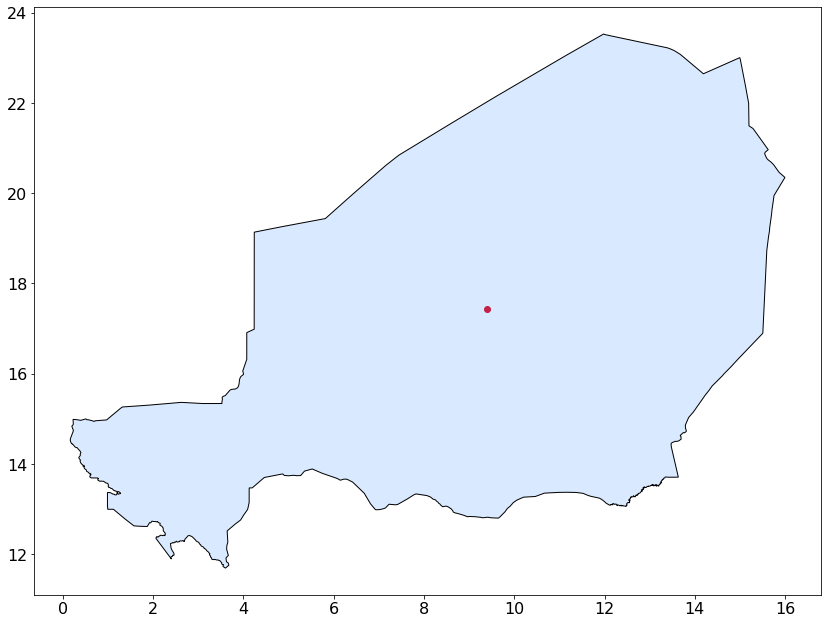

In [11]:
# therefore first extract the country centroid
country_centroid=country_shape.Centroid()

# plot the country and the centroid
ax=gk.drawGeoms(country_shape)
gk.drawGeoms(country_centroid, ax=ax)

In [15]:
# now create a metric Lamber Azimutha Equal Area spatial reference system, centered on the country centroid longitude and latitude
LAEA_srs = gk.srs.centeredLAEA(country_centroid.GetX(), country_centroid.GetX())
print(LAEA_srs)

PROJCS["unnamed",
    GEOGCS["GRS 1980(IUGG, 1980)",
        DATUM["unknown",
            SPHEROID["GRS80",6378137,298.257222101],
            TOWGS84[0,0,0,0,0,0,0]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Lambert_Azimuthal_Equal_Area"],
    PARAMETER["latitude_of_center",9.40124393959842],
    PARAMETER["longitude_of_center",9.40124393959842],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["Meter",1],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]


In [17]:
# remember, if you wish to see what input are requested for a class or method, you can use ? in Jupyter Notebook to show the docstring explanations
gl.ExclusionCalculator?

Init signature:
gl.ExclusionCalculator(
    region,
    start_raster=None,
    srs=3035,
    pixelRes=100,
    where=None,
    padExtent=0,
    initialValue=True,
    verbose=True,
    **kwargs,
)
Docstring:     
The ExclusionCalculator object makes land eligibility (LE) analyses easy
and quick. Once initialized to a particular region, the ExclusionCalculator
object can be used to incorporate any geospatial dataset (so long as it is
interpretable by GDAL) into the LE analysis.


Note:
-----
By default, ExclusionCalculator is always initialized at 100x100 meter
resolution in the EPSG3035 projection system. This is well-suited to LE
analyses in Europe, however if another region is being investigated or else
if another resolution or projection system is desired for any other reason,
this can be incorporated as well during the initialization stage.

If you need to find a new projection system for your analyses, the following
website is helpful: http://spatialreference.org/ref/epsg/


Initi

<Axes:>

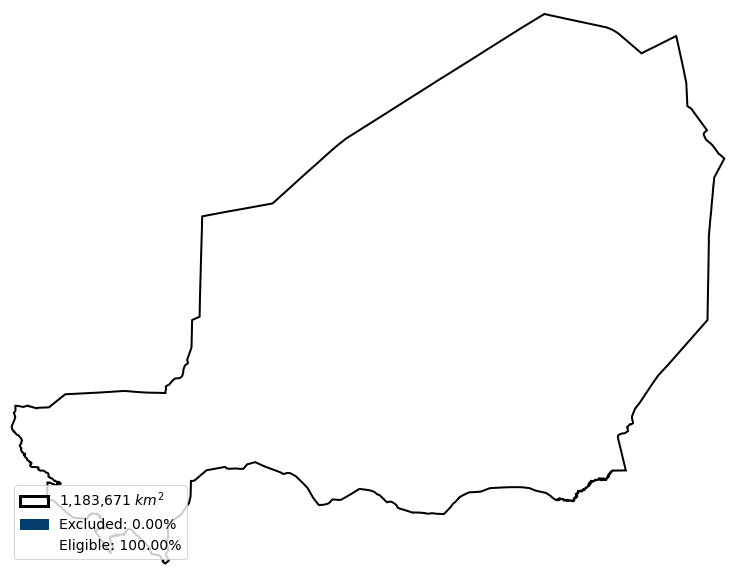

In [21]:
# now create an empty ExclusionCalculator class instance for our country, with the srs that we created above, and save as variable ec
ec = gl.ExclusionCalculator(
    region=country_shape,
    srs=LAEA_srs,
    pixelRes=resolution,
)
# the .draw() method can be applied onto a glaes.ExclusionCalculator class instance and will draw the boundaries with the excluded area colored, with the area in km² and excluded/eligible percentage values
# currently no area is excluded since we just created an empty class instance
ec.draw()

In [31]:
ec = gl.ExclusionCalculator(
    region="/storage/internal/data/gears/lecture_heidi_niger/data/00_general_data/00_geospatial_data/GADM_country_shapes/gadm36_1.shp",
    where="GID_1='NER.5_1'",
    srs=LAEA_srs,
    pixelRes=resolution,
)

In [28]:
roads_df=gk.vector.extractFeatures("/storage/internal/data/c-winkler/04_Data/01_Geodata/Infrastructure/osm_data/niger/niger_gis_osm_roads_free_1.shp")
roads_df.head()

,geom,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel
0,"LINESTRING (7.1113201 13.4873089,7.1112838 13....",23583983,5112,trunk,Avenue Seyni Kountche,N9,F,30,0,F,F
1,"LINESTRING (3.1952646 13.040617,3.1952766 13.0...",23687625,5113,primary,None,N 7,B,0,0,F,F
2,"LINESTRING (3.1954819 13.0452623,3.1952351 13....",23687626,5113,primary,None,N 1,B,0,0,F,F
3,"LINESTRING (2.1218016 13.5202015,2.1215995 13....",23691142,5115,tertiary,Avenue de l'Arewa,None,B,0,0,F,F
4,"LINESTRING (7.1056615 13.5147391,7.1056706 13....",23791052,5112,trunk,Trans-Sahelian Highway,N 9,F,0,0,F,F


In [29]:
roads_df.fclass.unique()

array(['trunk', 'primary', 'tertiary', 'unclassified', 'secondary',
       'residential', 'service', 'track', 'path', 'secondary_link',
       'track_grade3', 'track_grade5', 'track_grade4', 'primary_link',
       'tertiary_link', 'footway', 'bridleway', 'trunk_link',
       'pedestrian', 'steps', 'track_grade2', 'track_grade1', 'cycleway',
       'living_street', 'unknown', 'motorway'], dtype=object)

In [30]:
main_roads=['trunk', 'primary', 'tertiary', 'unclassified', 'secondary', 'secondary_link', 'primary_link', 'trunk_link', 'motorway']

In [35]:
f"fclass in ('{main_roads_str}')"

"fclass in ('trunk','primary','tertiary','unclassified','secondary','secondary_link','primary_link','trunk_link','motorway')"

<Axes:>

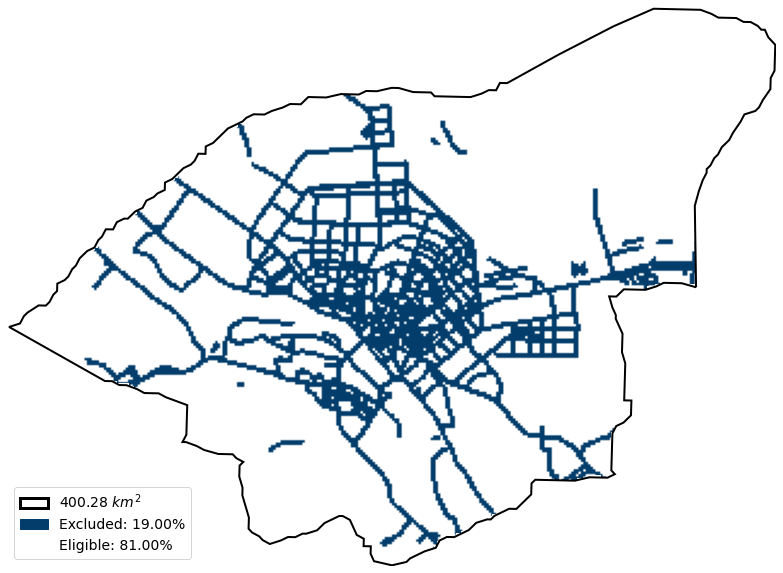

In [33]:
main_roads_str = "','".join(main_roads)
ec.excludeVectorType(
    "/storage/internal/data/c-winkler/04_Data/01_Geodata/Infrastructure/osm_data/niger/niger_gis_osm_roads_free_1.shp", 
    buffer=100,
    where=f"fclass in ('{main_roads_str}')")
ec.draw()

<Axes:>

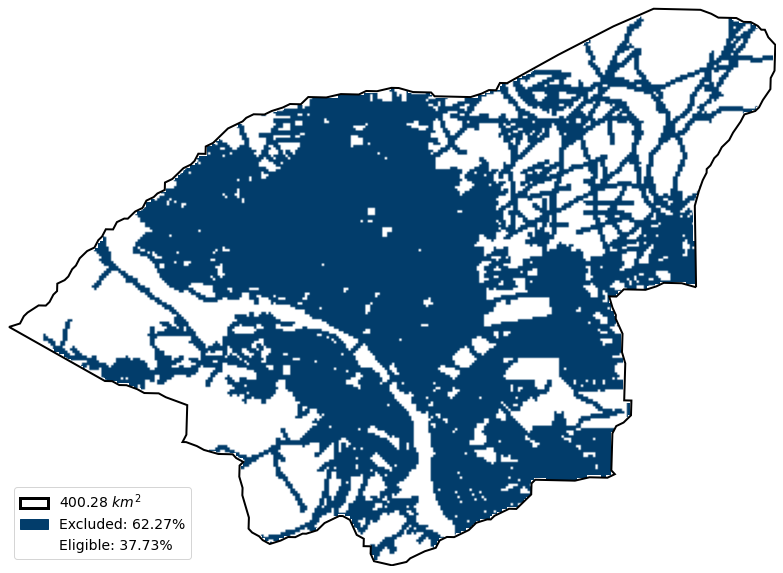

In [34]:
# now we create a first exclusion criterion
ec.excludeVectorType("/storage/internal/data/c-winkler/04_Data/01_Geodata/Infrastructure/osm_data/niger/niger_gis_osm_roads_free_1.shp", buffer=100)
ec.draw()

In [26]:
# now we create a first exclusion criterion
ec.excludeVectorType("/storage/internal/data/c-winkler/04_Data/01_Geodata/Infrastructure/osm_data/niger/niger_gis_osm_roads_free_1.shp", buffer=100)

<Axes:>

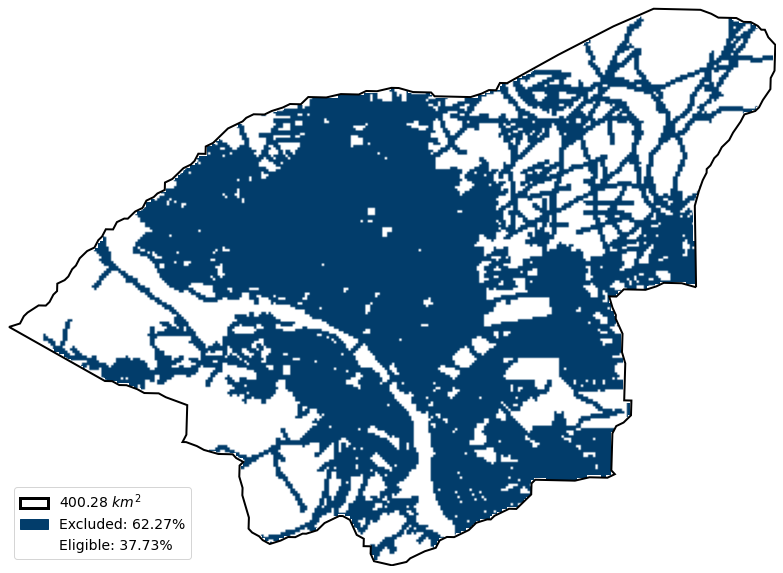

In [27]:
ec.draw()